In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset

# Split data into training and testing sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 2s 0us/step


In [2]:


# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# Reshape input data into 2D array (28x28 pixels)
X_train = X_train.reshape(len(X_train), 28*28)
X_test = X_test.reshape(len(X_test), 28*28)

# Convert target variable to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 784)
Y_train: (60000, 10)
X_test:  (10000, 784)
Y_test:  (10000, 10)


In [3]:
import matplotlib.pyplot as plt

def plot_classification_error(history):
    # Get training accuracy values
    train_acc = history.history['accuracy']
    
    # Get validation accuracy values
    val_acc = history.history['val_accuracy']
    
    # Calculate classification error
    train_error = [1 - acc for acc in train_acc]
    val_error = [1 - acc for acc in val_acc]
    
    # Create the classification error plot
    epochs = range(1, len(train_error) + 1)
    plt.plot(epochs, train_error, 'b', label='Training Error')
    plt.plot(epochs, val_error, 'r', label='Validation Error')
    plt.title('Training and Validation Classification Error')
    plt.xlabel('Epochs')
    plt.ylabel('Classification Error')
    plt.legend()
    plt.show()

import numpy as np

def classification_error(model, X_test, y_test):
    # Make predictions on test data
    y_pred = model.predict(X_test)
    # Convert predicted probabilities to class labels
    y_pred_labels = np.argmax(y_pred, axis=1)
    # Convert true labels to class labels
    y_true_labels = np.argmax(y_test, axis=1)
    # Compute classification error percentage
    error_pct = 100 * (1 - np.sum(y_pred_labels == y_true_labels) / len(y_true_labels))
    return error_pct

def plot_accuracy(history):
    # Get training accuracy values
    train_acc = history.history['accuracy']
    
    # Get validation accuracy values
    val_acc = history.history['val_accuracy']
    
    # Create the accuracy plot
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [4]:
import tensorflow as tf
from tensorflow import keras


# Define the neural network architecture
model1 = keras.Sequential([
    keras.layers.Dense(800, activation='sigmoid', input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(800, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

#Compile the model with categorical cross-entropy loss and Adam optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history1 = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss1, test_acc1 = model1.evaluate(X_test, y_test)
print('Test loss:', test_loss1)
print('Test accuracy:', test_acc1)


model2 = keras.Sequential([
    keras.layers.Dense(1024, activation='sigmoid', input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss2, test_acc2 = model2.evaluate(X_test, y_test)
print('Test loss:', test_loss2)
print('Test accuracy:', test_acc2)


model3 = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history3 = model3.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss3, test_acc3 = model3.evaluate(X_test, y_test)
print('Test loss:', test_loss3)
print('Test accuracy:', test_acc3)


from tensorflow.keras.constraints import MaxNorm

model4 = keras.Sequential([
    keras.layers.Dense(1024, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1024, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history4 = model4.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss4, test_acc4 = model4.evaluate(X_test, y_test)
print('Test loss:', test_loss4)
print('Test accuracy:', test_acc4)


model5 = keras.Sequential([
    keras.layers.Dense(2048, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2048, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(2048, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history5 = model5.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss5, test_acc5 = model5.evaluate(X_test, y_test)
print('Test loss:', test_loss5)
print('Test accuracy:', test_acc5)


model6 = keras.Sequential([
    keras.layers.Dense(4096, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model6.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history6 = model6.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss6, test_acc6 = model6.evaluate(X_test, y_test)
print('Test loss:', test_loss6)
print('Test accuracy:', test_acc6)


model7 = keras.Sequential([
    keras.layers.Dense(8192, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8192, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history7 = model7.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss7, test_acc7 = model7.evaluate(X_test, y_test)
print('Test loss:', test_loss7)
print('Test accuracy:', test_acc7)

Epoch 1/50
1875/1875 [==============================] - 12s 3ms/step - loss: 0.3997 - accuracy: 0.8752 - val_loss: 0.1787 - val_accuracy: 0.9455
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1815 - accuracy: 0.9441 - val_loss: 0.1194 - val_accuracy: 0.9627
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1315 - accuracy: 0.9591 - val_loss: 0.0967 - val_accuracy: 0.9698
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1045 - accuracy: 0.9676 - val_loss: 0.0862 - val_accuracy: 0.9711
Epoch 5/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0869 - accuracy: 0.9722 - val_loss: 0.0698 - val_accuracy: 0.9778
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0757 - accuracy: 0.9755 - val_loss: 0.0676 - val_accuracy: 0.9786
Epoch 7/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0668 - accuracy: 0.9786 - val_loss: 0.0698 - val_accuracy

In [5]:
import tensorflow as tf
from tensorflow import keras


# Define the neural network architecture
model8 = keras.Sequential([
    keras.layers.Dense(800, activation='sigmoid', input_shape=(28*28,)),
    keras.layers.Dense(800, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

#Compile the model with categorical cross-entropy loss and Adam optimizer
model8.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history8 = model8.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss8, test_acc8 = model8.evaluate(X_test, y_test)
print('Test loss:', test_loss8)
print('Test accuracy:', test_acc8)


model9 = keras.Sequential([
    keras.layers.Dense(1024, activation='sigmoid', input_shape=(28*28,)),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(1024, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model9.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history9 = model9.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss9, test_acc9 = model9.evaluate(X_test, y_test)
print('Test loss:', test_loss9)
print('Test accuracy:', test_acc9)


model10 = keras.Sequential([
    keras.layers.Dense(1024, activation='relu', input_shape=(28*28,)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history10 = model10.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss10, test_acc10 = model10.evaluate(X_test, y_test)
print('Test loss:', test_loss10)
print('Test accuracy:', test_acc10)


from tensorflow.keras.constraints import MaxNorm

model11 = keras.Sequential([
    keras.layers.Dense(1024, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dense(1024, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dense(1024, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model11.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history11 = model11.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss11, test_acc11 = model11.evaluate(X_test, y_test)
print('Test loss:', test_loss11)
print('Test accuracy:', test_acc11)


model12 = keras.Sequential([
    keras.layers.Dense(2048, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dense(2048, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dense(2048, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model12.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history12 = model12.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss12, test_acc12 = model12.evaluate(X_test, y_test)
print('Test loss:', test_loss12)
print('Test accuracy:', test_acc12)


model13 = keras.Sequential([
    keras.layers.Dense(4096, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dense(4096, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model13.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history13 = model13.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss13, test_acc13 = model13.evaluate(X_test, y_test)
print('Test loss:', test_loss13)
print('Test accuracy:', test_acc13)


model14 = keras.Sequential([
    keras.layers.Dense(8192, activation='sigmoid', kernel_constraint=MaxNorm(6.0), input_shape=(28*28,)),
    keras.layers.Dense(8192, activation='sigmoid', kernel_constraint=MaxNorm(6.0)),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model with categorical cross-entropy loss and Adam optimizer
model14.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history14 = model14.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the testing data
test_loss14, test_acc14 = model14.evaluate(X_test, y_test)
print('Test loss:', test_loss14)
print('Test accuracy:', test_acc14)

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3293 - accuracy: 0.9003 - val_loss: 0.1674 - val_accuracy: 0.9512
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1301 - accuracy: 0.9601 - val_loss: 0.1060 - val_accuracy: 0.9657
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0822 - accuracy: 0.9741 - val_loss: 0.0781 - val_accuracy: 0.9757
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0581 - accuracy: 0.9815 - val_loss: 0.0739 - val_accuracy: 0.9774
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0424 - accuracy: 0.9858 - val_loss: 0.0767 - val_accuracy: 0.9768
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0675 - val_accuracy: 0.9816
Epoch 7/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0705 - val_accuracy:

In [6]:
import matplotlib.pyplot as plt

def plot_validation_error(histories):
    # Get the validation accuracy for each model
    val_accs = [history.history['val_accuracy'] for history in histories]

    # Plot the validation accuracy for each model
    for i in range(len(val_accs)):
        if i < 7:
            plt.plot(val_accs[i], color='blue', label='model ' + str(i+1))
        else:
            plt.plot(val_accs[i], color='orange', label='Model ' + str(i+1))

    # Add plot labels and legend
    plt.title('Validation Accuracy During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

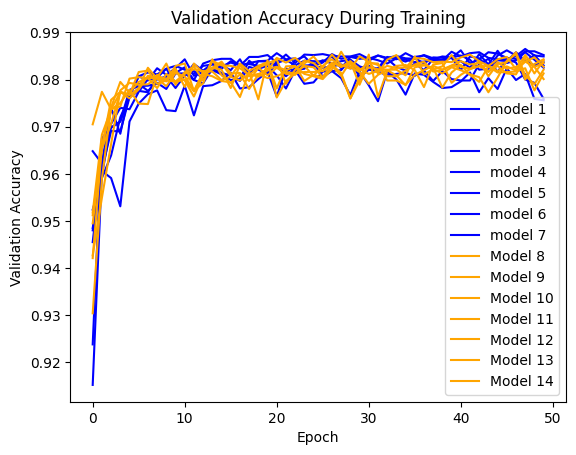

In [7]:
histories = [history1, history2, history3, history4, history5, history6, history7, history8, history9, history10, history11, history12, history13, history14]

plot_validation_error(histories)

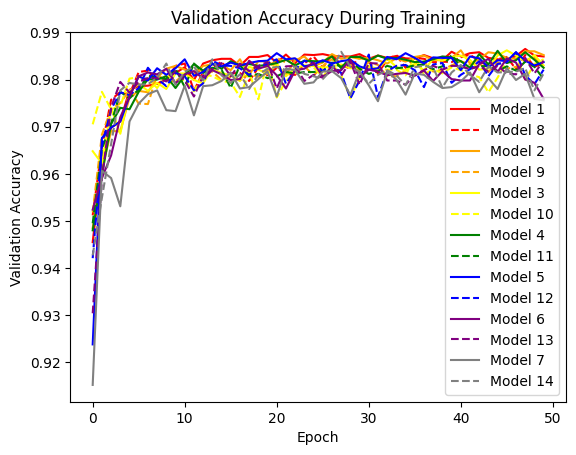

In [14]:
def plot_validation_error(histories, models):
    # Define colors for each pair of models
    colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'gray']

    # Plot the validation accuracy for each pair of models
    for i in range(len(models)-7):
        history1 = histories[i]
        history2 = histories[i+7]
        color = colors[i]
        label1 = 'Model ' + str(models[i])
        label2 = 'Model ' + str(models[i+7])
        plt.plot(history1.history['val_accuracy'], color=color, label=label1)
        plt.plot(history2.history['val_accuracy'], color=color, linestyle='dashed', label=label2)

    # Add plot labels and legend
    plt.title('Validation Accuracy During Training')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.legend()
    plt.show()

histories = [history1, history2, history3, history4, history5, history6, history7, history8, history9, history10, history11, history12, history13, history14]
models = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

plot_validation_error(histories, models)

313/313 [==============================] - 1s 2ms/step


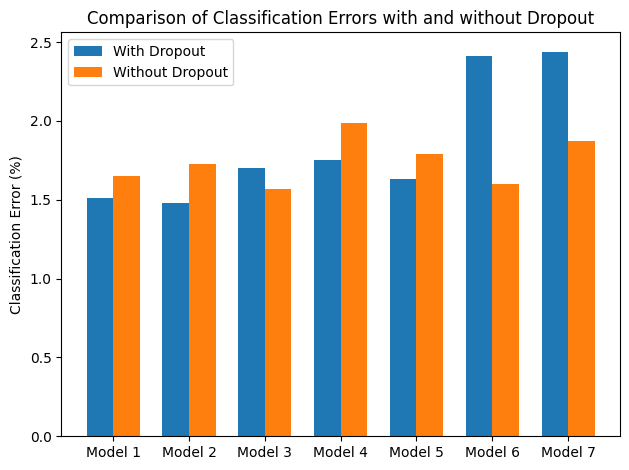

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def compare_classification_error(models_with_dropout, models_without_dropout, X_test, y_test):
    errors = []
    for i in range(len(models_with_dropout)):
        error1 = classification_error(models_with_dropout[i], X_test, y_test)
        error2 = classification_error(models_without_dropout[i], X_test, y_test)
        errors.append((error1, error2))
    return errors

models_with_dropout = [model1, model2, model3, model4, model5, model6, model7]
models_without_dropout = [model8, model9, model10, model11, model12, model13, model14]

errors = compare_classification_error(models_with_dropout, models_without_dropout, X_test, y_test)

x = np.arange(len(errors))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [e[0] for e in errors], width, label='With Dropout')
rects2 = ax.bar(x+ width/2, [e[1] for e in errors], width, label='Without Dropout')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Classification Error (%)')
ax.set_title('Comparison of Classification Errors with and without Dropout')
ax.set_xticks(x)
ax.set_xticklabels(['Model ' + str(i+1) for i in range(len(errors))])
ax.legend()

fig.tight_layout()

plt.show()